# Experimenting with the tutorial

**Overview**
This exercise is related to the week 4 tutorial.
 
The individual tasks will ask you to either reflect on parts of the tutorial or modify specific code cells from the tutorial. Specifically, [Task 2](#project) and [Task 3](#ls) require modifications to the code of the tutorial notebook.
 


<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#copy">Task 1: Copy notebook</a>
            </li>
            <li>
            <a href="#project">Task 2: Projection experiments</a>
            </li>
            <li>
            <a href="#ls">Task 3: Linear Least Squares Experiments</a>
            </li>
            <li>
            <a href="#ls1">Task 4: Linear Least Squares Reflections</a>
            </li>
            <li>
            <a href="#poly">Task 5: Second-order polynomial</a>
            </li>
            <li>
            <a href="#pmatrix">Task 6: Projection matrix</a>
            </li>
        </ul>
    </div>
</article>


---
**Task 1 (easy): Copy notebook**
Copy the tutorial notebook
 in the repository. 
This makes it easy to go back to the original in case something goes wrong.

---
---
**Task 2 (easy): Projection experiments👩‍💻📽️**
This task builds on the $\textbf{Projections}$ section in the tutorial.
1. Search and identify comment `##1`
. 
2. Change the values of the matrix $A$ (below comment `##1`
) to modify the line. Experiment with different values and observe how the projection changes in the plot.
3. Change the matrix $A$, such that $PX$ ≈ $X$ (that is the projection leaves $X$ almost unchanged). 
4. Search and identify comment `##2`
.
5. Set the matrix $A$  = $\begin{bmatrix} 1 \\ 0.5 \end{bmatrix}$, then apply the projection matrix $P$ twice, i.e. calculate $PPX$ (just below the comment). How does this affect the projected points?


---

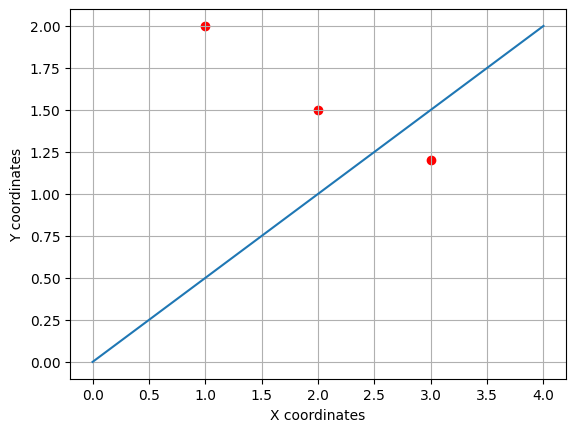

In [32]:
# Tutorial notebook
import numpy as np
import matplotlib.pyplot as plt

# Three points
X = np.array([
    [1, 2],
    [2, 1.5],
    [3, 1.2]
]).T

# Show plot
plt.scatter(X[0, :], X[1, :], c="r")

# Make line points (remember Numpy broadcasting)
x = np.linspace(0, 4)
f_x = x * 0.5

# Plot line
# Add grid lines
plt.grid(True)
plt.plot(x, f_x)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.show()



P:
 [[0.8 0.4]
 [0.4 0.2]]
projected points:
 [[1.6  2.2  2.88]
 [0.8  1.1  1.44]]


Text(0, 0.5, 'Y coordinates')

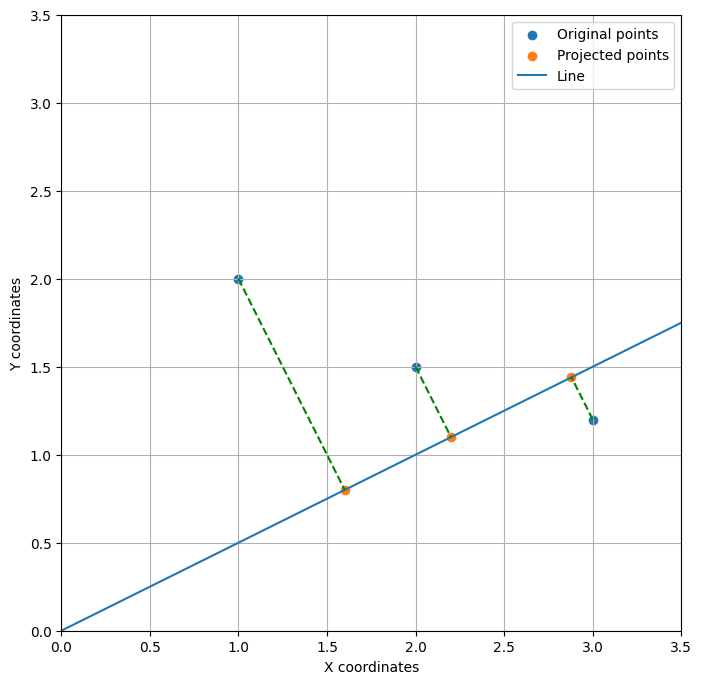

In [ ]:
##1
#The line l written as the design matrix
A = np.array([[1, 0.5]]).T  #  original

#A = np.array([[1], [1]])  # 45° line
#A = np.array([[0], [1]])  # vertical line

##2

P = (A @ np.linalg.inv(A.T @ A)) @ A.T
print("P:\n", P)


x_prime = P @ (P @ X) # it does not change the result somehow
print("projected points:\n", x_prime)


plt.figure(figsize=(8, 8))

plt.scatter(X[0, :], X[1, :], label="Original points")  # Old points
plt.scatter(x_prime[0, :], x_prime[1, :], label="Projected points")  # Projected points
plt.plot(x, f_x, label="Line")  # Line
plt.legend()


P1 = np.concatenate([X.T[:, :].reshape(1, 3, 2), x_prime.T[:, :].reshape(1, 3, 2)], axis=0)

# Plot projection/error lines
plt.plot(P1[:, 0, 0], P1[:, 0, 1], 'g--')
plt.plot(P1[:, 1, 0], P1[:, 1, 1], 'g--')
plt.plot(P1[:, 2, 0], P1[:, 2, 1], 'g--')

# Add grid lines
plt.grid(True)

# Set axes limits to be the same for equal aspect ratio
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")

[[1. 1.]
 [2. 1.]
 [3. 1.]]
[-0.4         2.36666667]
[1.96666667 1.56666667 1.16666667]


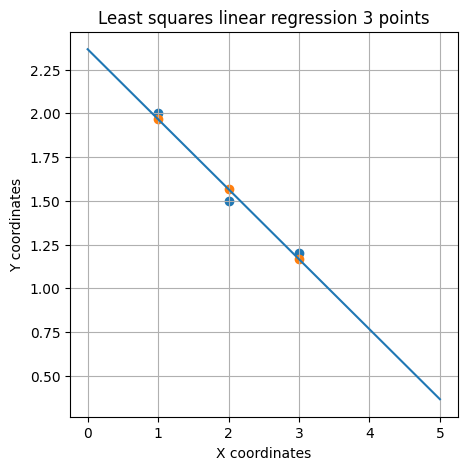

In [ ]:
## This is the solution of a projection that keeps X almost unchanged:

X = np.array([
    [1, 2],
    [2, 1.5],
    [3, 1.2]
]).T

x_vals = X[0, :]
y_vals = X[1, :]

P = np.linalg.inv(A.T @ A) @ A.T
w = P @ y_vals
y_hat = A @ w

print(A)
print(w)
print(y_hat)

x = np.linspace(0, 5)  # Create range of values
y = x * w[0] + w[1]  # Calculate f(x)

plt.figure(figsize=(5, 5))

plt.plot(x, y)  # Plot line
plt.scatter(X[0, :], X[1, :])  # Plot original points

plt.scatter(X[0, :], y_hat)  # Plot the points
plt.title('Least squares linear regression 3 points')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.grid(True)
plt.show()


---
**Task 3 (easy): Linear Least Squares Experiments👩‍💻**
This task builds on the $\textbf{Linear Least Squares}$ section in the tutorial.
1. Search and identify comment `##3`
.
2. Change the values of the first point in the matrix `X`
 such that it gradually moves further and further away from the line. Observe how it affects the error $RMS$.
3. Add two points to `X`
 and observe how they affect the fitted line and the error.


---

error: 0.4082482920968562


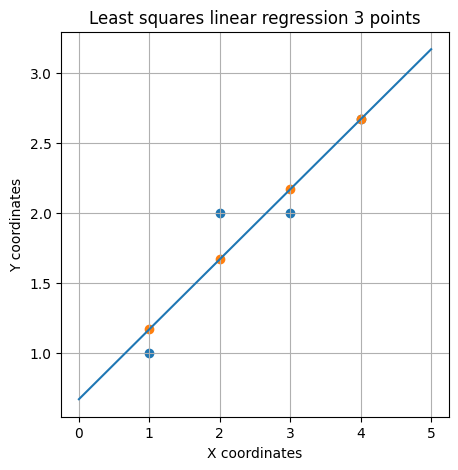

In [58]:
## 3
# Define the example points
X = np.array([
    [1, 1],
    [2, 2],
    [3, 2], 
    [5, 2],
    [4,1] # this outlier causes a lot of error on the data.
]).T

X = np.array([
    [1, 1],
    [2, 2],
    [3, 2],
    [4,2.6666]
]).T



x_vals = X[0, :]
y_vals = X[1, :]

A = np.vstack((x_vals, np.ones(x_vals.shape))).T
P = np.linalg.inv(A.T @ A) @ A.T
w = P @ y_vals

y_hat = A @ w


x = np.linspace(0, 5)  # Create range of values
y = x * w[0] + w[1]  # Calculate f(x)

diff = y_vals - y_hat
e = np.sqrt(diff @ diff.T)
print("error:", e)

plt.figure(figsize=(5, 5))

plt.plot(x, y)  # Plot line
plt.scatter(X[0, :], X[1, :])  # Plot original points

plt.scatter(X[0, :], y_hat)  # Plot the points
plt.title('Least squares linear regression 3 points')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.grid(True)
plt.show()




---
**Task 4 (easy): Linear Least Squares Reflections💡📽️**
1. How can you change the two additional points so the fitted line does not move?
2. What happens to the error when removing all but two points from `X`
?
3. What happens when you remove all but one point from `X`
?
4. Reflect on how the quality of the data affects the projection and thus the solution. 


---

In [0]:
# Write your reflections here
# 1. If i insert points that are exactly projected on the line it wont change.
# 2. the error becomes 0 because then is a perfect fit.
# 3. it gives an error
# 4. It affects a lot, because as I inserted an outlier the error became very high.

## Pen and paper exercises
A 2. order polynomial is given by 

$$f(x) = w_0 + w_1x + w_2x^2 = \sum^2_{i=0} w_ix^i.$$

Generally, an $N$'th order  polynomial is given by

$$f(x) = \sum^N_{i=0} w_ix^i,$$
where $\mathbb{w}$ is a vector of coefficients.

---
**Task 5 (medium): Second-order polynomial♾️📽️**
1. Identify the knowns and unknowns in the polynomial above.
2. Is the function linear or non-linear in $\mathbb{w}$?
3. Is the function linear or non-linear in $\mathbb{x}$?
4. Provide the outline of an algorithm for fitting a second-order polynomial using linear least squares.
5. Generalize this algorithm to n-th order polynomials.


---

In [0]:
# knowns : x , f(x)  unknowns: w (usually)
# it is linear in w
# it is non linear on x

# A = [x**2,x,1]
# y = [y1,y2]
# P = np.linalg.inv(A.T @ A) @ A.T
# w = P @ y_vals


---
**Task 6 (medium): Projection matrix♾️**
The projection matrix $P = A(A^\top A )^{-1}A^\top$ is, under certain conditions, equal to the identity matrix.
1. Give an example of a design matrix $A$ for which $P=I$.
2. Explain why projection matrices are usually not identity matrices.
3. (optional) Prove a condition for which $P=I$. Hint: when is $A^\top A=I$?.


---

In [ ]:
# Write your solution here
# This is an example of A for which P = Identity
A = np.array([[1,0],[0,1]])
w = A.T @ A
print(w)

# 𝑃=𝐼 if and only if 𝐴 is square and orthonormal, meaning 𝐴⊤𝐴=𝐼

[[1 0]
 [0 1]]
